In [1]:
import warnings
warnings.filterwarnings ("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.decomposition import PCA
from keras.layers import Dense,Dropout, LSTM,GRU, SimpleRNN, Conv1D, Bidirectional,Flatten,Dense, Input
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('Domestic_Maple_Syrup_Production_2000-2021.csv')

In [3]:
x = ['Date_Open', 'Date_Closed']
for i in x:
  df[i] = pd.to_datetime(df[i],format='mixed')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year
df

,State,Num_of_Taps,Yield_per_Tap,Production,Avg_Price,Value,Retail_Price,Wholesale_Price,Bulk_P_Price,Bulk_G_Price,Date_Open,Date_Closed,Year
0,Maine,1960,0.262,514,38.6,19840,61.4,48.30,3.20,35.10,2021-02-15,2021-04-30,2021
1,Michigan,550,0.273,150,46.3,6945,47.7,37.60,2.40,26.80,2021-02-01,2021-04-14,2021
2,New Hampshire,530,0.240,127,64.9,8242,65.5,48.20,2.40,26.40,2021-01-11,2021-04-16,2021
3,New York,2900,0.223,647,37.8,24457,45.6,41.50,2.40,26.70,2021-01-01,2021-05-04,2021
4,Pennsylvania,745,0.226,168,36.2,6082,41.3,39.80,2.50,27.60,2021-01-04,2021-04-15,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,New York,1163,0.166,193,29.0,"6,090",28.1,24.3,1.35,15,NaT,NaT,2000
216,Ohio,432,0.222,96,34.3,"1,166",28.8,27.2,1.45,15.8,NaT,NaT,2000
217,Pennsylvania,360,0.192,69,28.4,"1,335",29.0,27.1,1.3,14.4,NaT,NaT,2000
218,Vermont,2090,0.132,275,30.0,"13,800",31.6,26.4,1.6,17.6,NaT,NaT,2000


In [4]:
df1 = df[[ 'Num_of_Taps', 'Yield_per_Tap', 'Production', 'Avg_Price',
'Value', 'Retail_Price', 'Wholesale_Price', 'Bulk_P_Price',
'Bulk_G_Price', 'State', 'Year' ]]
df1

,Num_of_Taps,Yield_per_Tap,Production,Avg_Price,Value,Retail_Price,Wholesale_Price,Bulk_P_Price,Bulk_G_Price,State,Year
0,1960,0.262,514,38.6,19840,61.4,48.30,3.20,35.10,Maine,2021
1,550,0.273,150,46.3,6945,47.7,37.60,2.40,26.80,Michigan,2021
2,530,0.240,127,64.9,8242,65.5,48.20,2.40,26.40,New Hampshire,2021
3,2900,0.223,647,37.8,24457,45.6,41.50,2.40,26.70,New York,2021
4,745,0.226,168,36.2,6082,41.3,39.80,2.50,27.60,Pennsylvania,2021
...,...,...,...,...,...,...,...,...,...,...,...
215,1163,0.166,193,29.0,"6,090",28.1,24.3,1.35,15,New York,2000
216,432,0.222,96,34.3,"1,166",28.8,27.2,1.45,15.8,Ohio,2000
217,360,0.192,69,28.4,"1,335",29.0,27.1,1.3,14.4,Pennsylvania,2000
218,2090,0.132,275,30.0,"13,800",31.6,26.4,1.6,17.6,Vermont,2000


In [5]:
df1.dropna (inplace = True)


In [6]:
df.dropna (inplace = True)
df

,State,Num_of_Taps,Yield_per_Tap,Production,Avg_Price,Value,Retail_Price,Wholesale_Price,Bulk_P_Price,Bulk_G_Price,Date_Open,Date_Closed,Year
0,Maine,1960,0.262,514,38.6,19840,61.4,48.30,3.20,35.10,2021-02-15,2021-04-30,2021
1,Michigan,550,0.273,150,46.3,6945,47.7,37.60,2.40,26.80,2021-02-01,2021-04-14,2021
2,New Hampshire,530,0.240,127,64.9,8242,65.5,48.20,2.40,26.40,2021-01-11,2021-04-16,2021
3,New York,2900,0.223,647,37.8,24457,45.6,41.50,2.40,26.70,2021-01-01,2021-05-04,2021
4,Pennsylvania,745,0.226,168,36.2,6082,41.3,39.80,2.50,27.60,2021-01-04,2021-04-15,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,New York,1830,0.240,439,40.6,"17,823",40.1,38.3,2.73,30,2009-01-05,2009-04-30,2009
126,Ohio,375,0.240,90,40.3,"3,627",37.7,35.9,2.7,29.9,2009-01-09,2009-04-16,2009
127,Pennsylvania,464,0.198,92,38.1,"3,505",38.0,32.2,2.7,29.5,2009-01-15,2009-04-25,2009
128,Vermont,3030,0.304,920,35.1,"32,292",43.9,38.5,2.9,32,2009-01-22,2009-05-04,2009


In [21]:
real_numeric_cols =['Production','Value','Wholesale_Price','Bulk_P_Price','Bulk_G_Price']
for i in real_numeric_cols:
  df[i]=df[i].str.replace(',','')

AttributeError: Can only use .str accessor with string values!

In [8]:
df.replace('(D)', None, inplace= True)

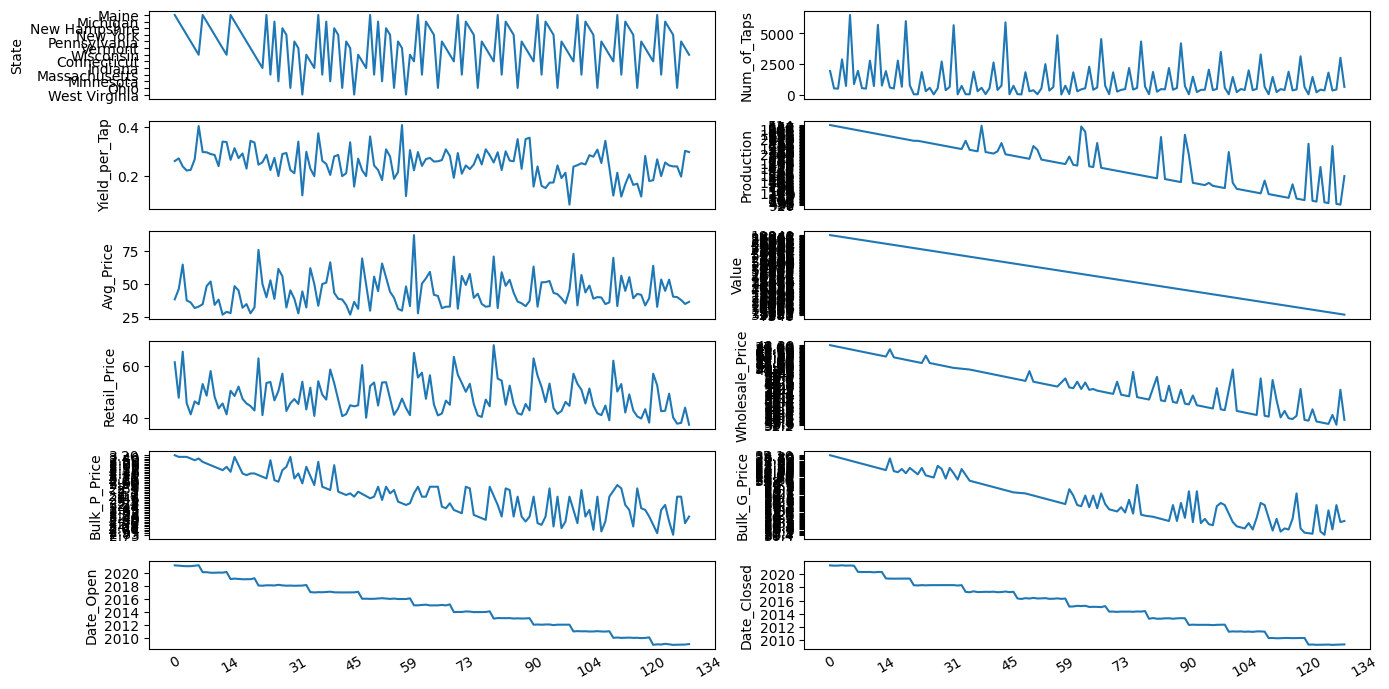

In [9]:
# Plot line charts
df_plot = df.copy()
ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

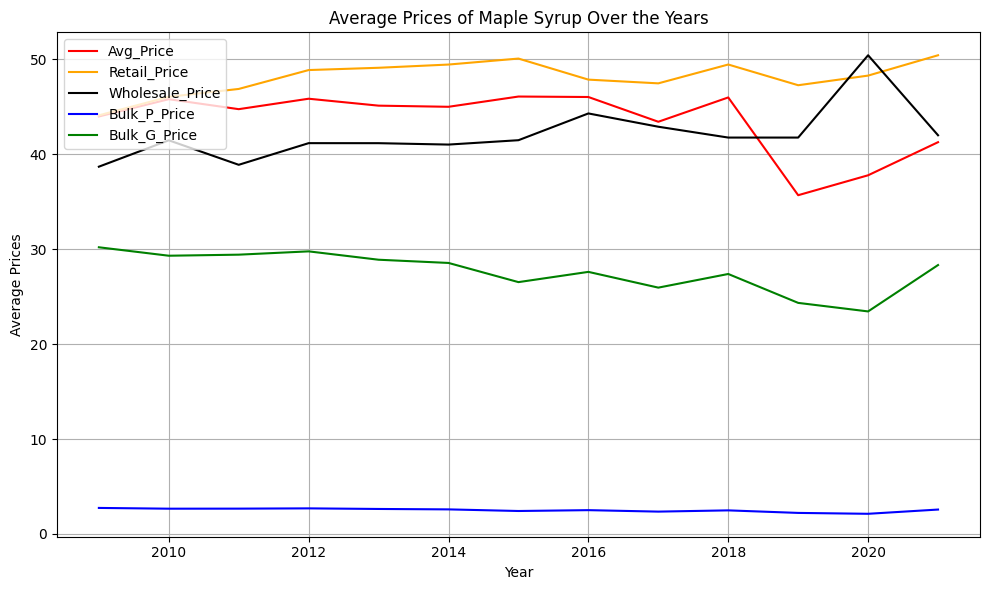

In [10]:

# Convert relevant columns to numeric types
numeric_columns = ['Avg_Price', 'Retail_Price', 'Wholesale_Price', 'Bulk_P_Price', 'Bulk_G_Price']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'Year' and calculate the mean
average_prices_over_years = df.groupby('Year')[numeric_columns].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
years = average_prices_over_years['Year']
colors = ['red', 'orange', 'black', 'blue', 'green']
price_columns = numeric_columns  # Use the same columns for plotting

for i in range(len(colors)):
    plt.plot(years, average_prices_over_years[price_columns[i]], label=price_columns[i], color=colors[i])

plt.xlabel('Year')
plt.ylabel('Average Prices')
plt.title('Average Prices of Maple Syrup Over the Years')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
   

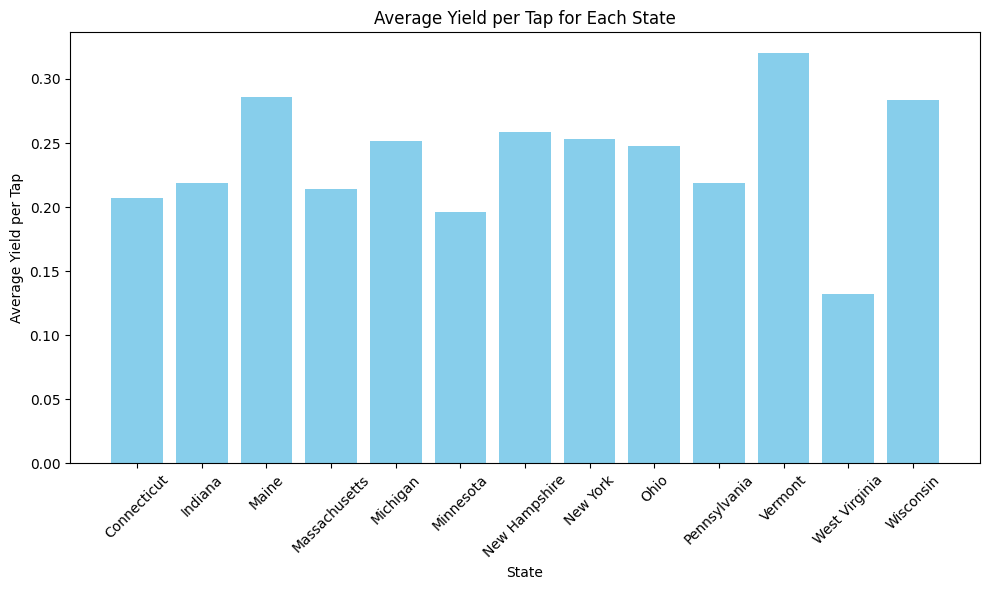

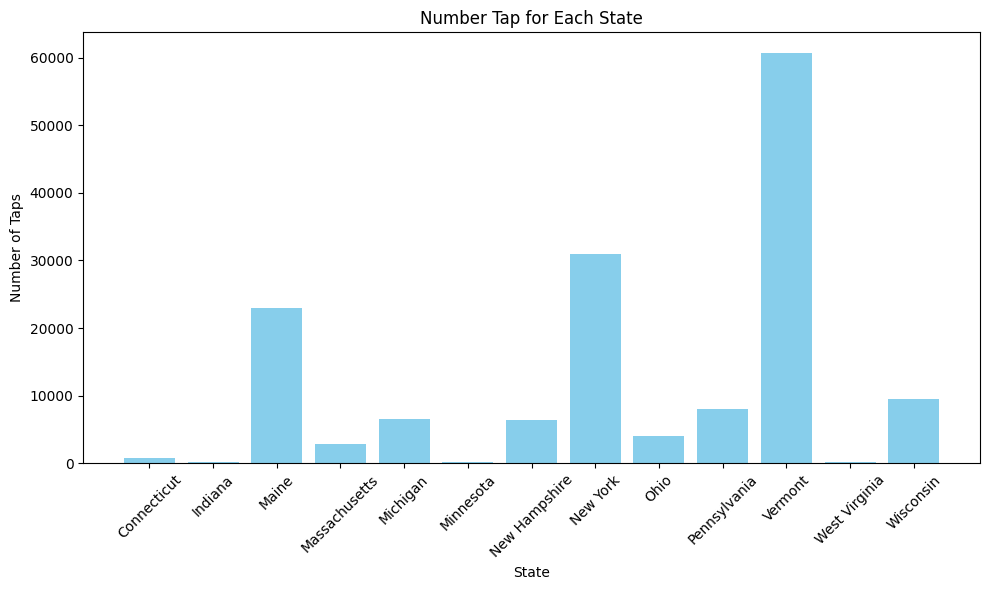

In [11]:
average_yield_per_tap = df.groupby('State')['Yield_per_Tap'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar (average_yield_per_tap['State'], average_yield_per_tap['Yield_per_Tap'], color= 'skyblue')
plt.xlabel('State')
plt. ylabel('Average Yield per Tap')
plt.title('Average Yield per Tap for Each State')
plt.xticks(rotation=45)
plt. tight_layout()
plt. show()
Num_of_Taps_viz = df.groupby('State')['Num_of_Taps'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(Num_of_Taps_viz['State'], Num_of_Taps_viz['Num_of_Taps'], color='skyblue')
plt.xlabel ('State')
plt.ylabel('Number of Taps')
plt.title( 'Number Tap for Each State')
plt.xticks(rotation=45)
plt. tight_layout()
plt.show()

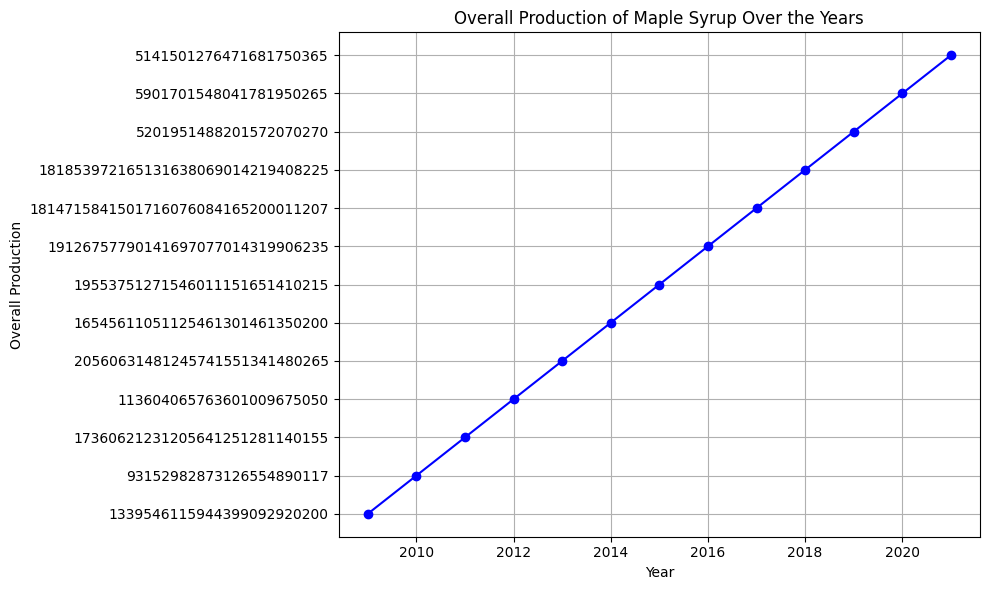

In [12]:
overall_production = df.groupby('Year')['Production']. sum().reset_index()
plt.figure(figsize=(10, 6))
years = overall_production[ 'Year']
production = overall_production['Production']
plt.plot (years, production, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel ('Overall Production')
plt.title('Overall Production of Maple Syrup Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

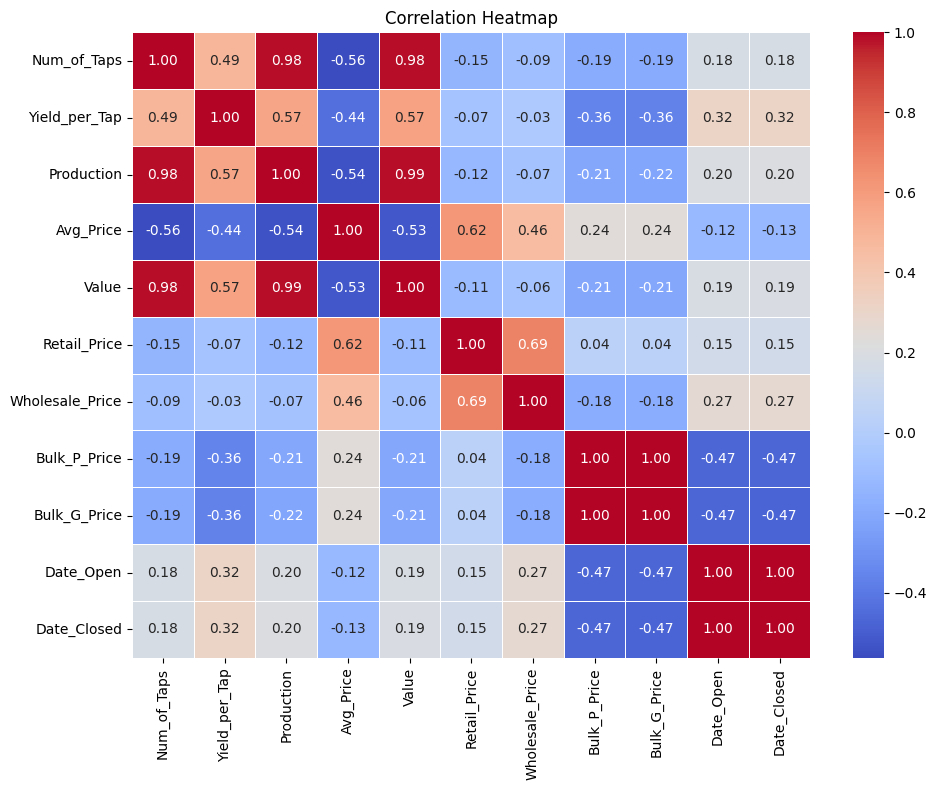

In [13]:
selected_columns = ['Num_of_Taps', 'Yield_per_Tap', 'Production', 'Avg_Price', 'Value',
          'Retail_Price', 'Wholesale_Price', 'Bulk_P_Price', 'Bulk_G_Price',
          'Date_Open', 'Date_Closed']
selected_df = df[selected_columns]
correlation_matrix = selected_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [14]:
df = pd.get_dummies (df, columns = ['State', 'Year'])

In [15]:
y = df1['Avg_Price']
x = df1.drop(['Avg_Price', 'State', 'Year', 'Num_of_Taps'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=30)

In [16]:
#from sklearn.preprocessing import StandardScaler as scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.fit_transform(y_test.reshape(-1,1))

ValueError: could not convert string to float: '1,990'